# 단순 선형 회귀

## # 01. 패키지 준비하기

In [7]:
import sys
sys.path.append('../../')
import helper

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

# 데이터를 훈련용과 테스트용으로 나누는 기능
from sklearn.model_selection import train_test_split

# 모델을 구성하기 위한 객체
from tensorflow.keras.models import Sequential

# 모델에 학습층을 쌓기 위한 클래스
from tensorflow.keras.layers import Dense

## # 02. 데이터셋 준비하기

In [3]:
origin = read_excel("https://data.hossam.kr/E04/cars.xlsx")
origin.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


## # 03. 데이터 전처리
  - 결측치 확인

In [4]:
origin.isna().sum()

speed    0
dist     0
dtype: int64

## # 04. 탐색적 데이터 분석
  - 기본통계 확인

In [5]:
origin.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


산점도 그래프와 추세선 확인

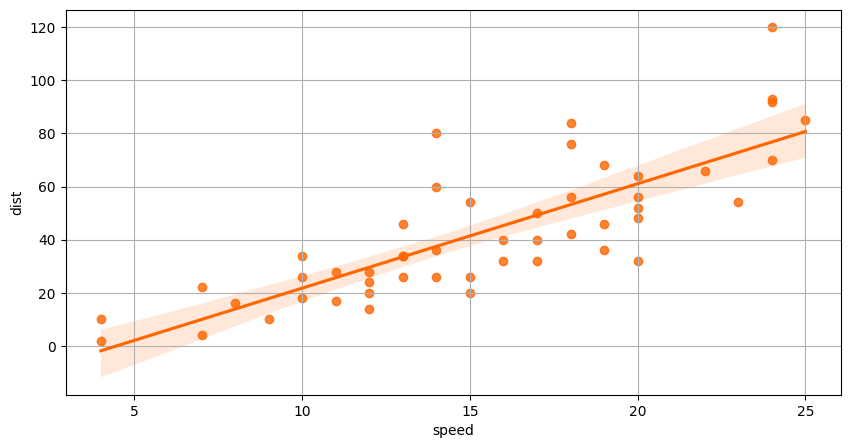

In [8]:
plt.figure(figsize=(10, 5))
sb.regplot(data=origin, x='speed', y='dist', color='#ff6600')
plt.grid()
plt.show()
plt.close()

  > 곡선보다는 선형 분포에 더 가까우므로 단순선형회귀모델을 적용하기로 함

## # 05. 데이터셋 분할하기

  1. 랜덤시드 고정

In [9]:
np.random.seed(777)

  2. 훈련 데이터(독립변수)와 레이브(종속변수) 구분하기

In [11]:
x = origin.drop(['dist'], axis = 1)
y = origin['dist']
print('훈련데이터 크기:', x.shape, "/ 레이블 크기:", y.shape)

훈련데이터 크기: (50, 1) / 레이블 크기: (50,)


  3. 훈련 데이터와 검증 데이터로 분할

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 777)
print("훈련용 데이터셋 크기: %d, 검증용 데이터셋 크기: %d" % (len(x_train), len(x_test)))

훈련용 데이터셋 크기: 35, 검증용 데이터셋 크기: 15


## # 06. 모델 개발

  1. 모델 정의

In [13]:
model = Sequential()
# 1차원의 데이터를 입력으로 받고, 32개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(32, activation = 'relu', input_shape = (1, )))
# 하나의 값을 출력
# -> 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
# -> linear는 기본값이므로 생략 가능함.
model.add(Dense(1, activation='linear'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


학습하기

In [14]:
result = model.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))

# 학습결과
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/300
2/2 [==============================] - 2s 219ms/step - loss: 2649.6594 - mae: 44.0765 - val_loss: 1847.8594 - val_mae: 37.4011
Epoch 2/300
2/2 [==============================] - 0s 43ms/step - loss: 2633.7219 - mae: 43.9212 - val_loss: 1836.2034 - val_mae: 37.2627
Epoch 3/300
2/2 [==============================] - 0s 38ms/step - loss: 2617.7568 - mae: 43.7664 - val_loss: 1824.4830 - val_mae: 37.1230
Epoch 4/300
2/2 [==============================] - 0s 32ms/step - loss: 2601.7363 - mae: 43.6092 - val_loss: 1812.5973 - val_mae: 36.9808
Epoch 5/300
2/2 [==============================] - 0s 22ms/step - loss: 2585.7737 - mae: 43.4504 - val_loss: 1800.6385 - val_mae: 36.8373
Epoch 6/300
2/2 [==============================] - 0s 23ms/step - loss: 2569.3062 - mae: 43.2914 - val_loss: 1788.6202 - val_mae: 36.6924
Epoch 7/300
2/2 [==============================] - 0s 26ms/step - loss: 2553.9236 - mae: 43.1327 - val_loss: 1776.9794 - val_mae: 36.5516
Epoch 8/300
2/2 [================

,loss,mae,val_loss,val_mae
epochs,,,,
1,2649.659424,44.076450,1847.859375,37.401054
2,2633.721924,43.921196,1836.203369,37.262669
3,2617.756836,43.766376,1824.483032,37.123001
4,2601.736328,43.609180,1812.597290,36.980839
5,2585.773682,43.450405,1800.638550,36.837265
...,...,...,...,...
296,273.377899,13.016190,249.720551,12.977301
297,273.388580,13.017861,249.993393,12.998112
298,273.245300,13.017108,250.304642,13.021475


## # 07. 학습 결과 평가

  1. 학습 결과 시각화

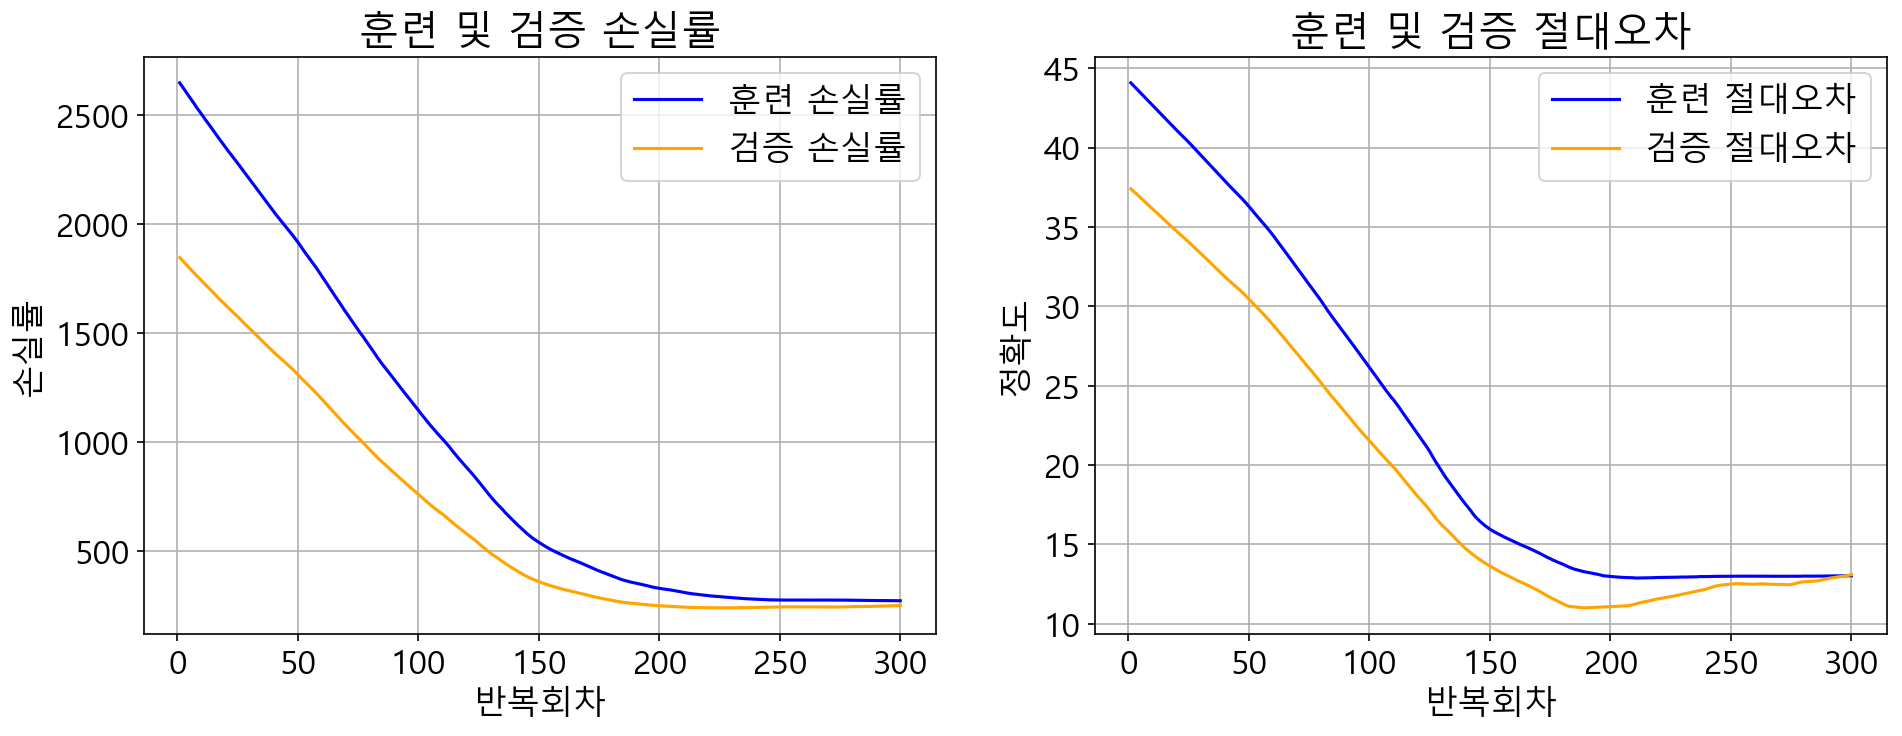

In [15]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sb.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='mae', data=result_df, color = 'blue', label = '훈련 절대오차', ax=ax2)
sb.lineplot(x=result_df.index, y='val_mae', data=result_df, color = 'orange', label = '검증 절대오차', ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

  2. 모델 성능 평가

In [16]:
evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 절대오차: %f" % (evaluate2[0], evaluate2[1]))

2/2 [==============================] - 0s 5ms/step - loss: 273.1177 - mae: 13.0369
최종 훈련 손실률: 273.117706, 최종 훈련 절대오차: 13.036874
1/1 [==============================] - 0s 21ms/step - loss: 251.2587 - mae: 13.0908
최종 검증 손실률: 251.258682, 최종 검증 절대오차: 13.090761


## # 08. 학습 결과 적용

  1. 테스트 데이터에 대한 예측 결과 산정

In [17]:
results = model.predict(x_test)
print(results)

1/1 [==============================] - 0s 95ms/step
[[67.222115]
 [38.79473 ]
 [35.95199 ]
 [33.109253]
 [55.85116 ]
 [41.637466]
 [41.637466]
 [53.00842 ]
 [35.95199 ]
 [55.85116 ]
 [41.637466]
 [58.693893]
 [21.738302]
 [38.79473 ]
 [13.210087]]


  2. 결과 데이터 셋 구성

In [18]:
kdf = DataFrame({
    '검증데이터': x_test['speed'],
    '실제값': y_test,
    '예측값' : results.flatten()
})

kdf['예측오차'] = kdf['실제값']-kdf['예측값']

kdf

,검증데이터,실제값,예측값,예측오차
44,23,54,67.222115,-13.222115
17,13,34,38.794731,-4.794731
11,12,14,35.951988,-21.951988
9,11,17,33.109253,-16.109253
36,19,46,55.851158,-9.851158
21,14,60,41.637466,18.362534
22,14,80,41.637466,38.362534
31,18,42,53.008419,-11.008419
12,12,20,35.951988,-15.951988
37,19,68,55.851158,12.148842


  3. 실제 결과값과 머신러닝에 의한 예측값 비교

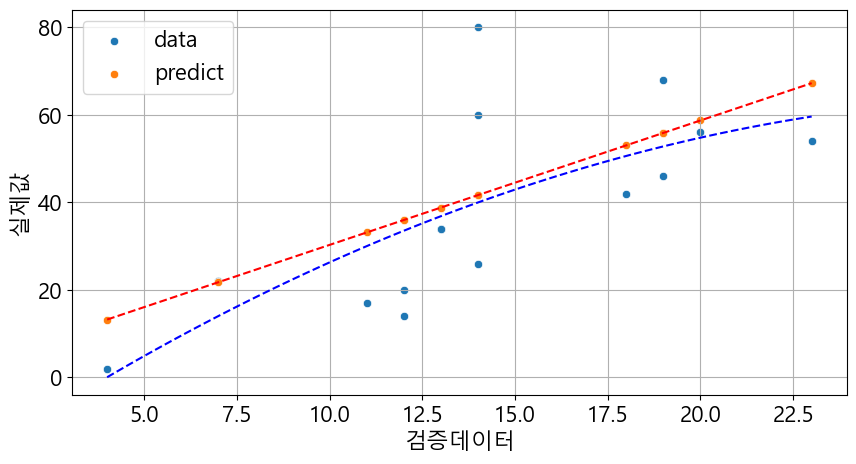

In [19]:
helper.regplot(x_left = kdf['검증데이터'], y_left = kdf['실제값'], y_left_pred = kdf['예측값'])

  4. 임의의 값에 대한 머신러능 예측 결과

In [20]:
my_speed = 50
results = model.predict([my_speed])
print('속도가 %d인 자동차의 제동거리는 %d로 예상됩니다.' % (my_speed, results))

1/1 [==============================] - 0s 81ms/step
속도가 50인 자동차의 제동거리는 143로 예상됩니다.
